<a href="https://colab.research.google.com/github/dedemasutti/AI-projects/blob/master/image_Segmentation_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array


1/1 [==============================] - 1s 1s/step


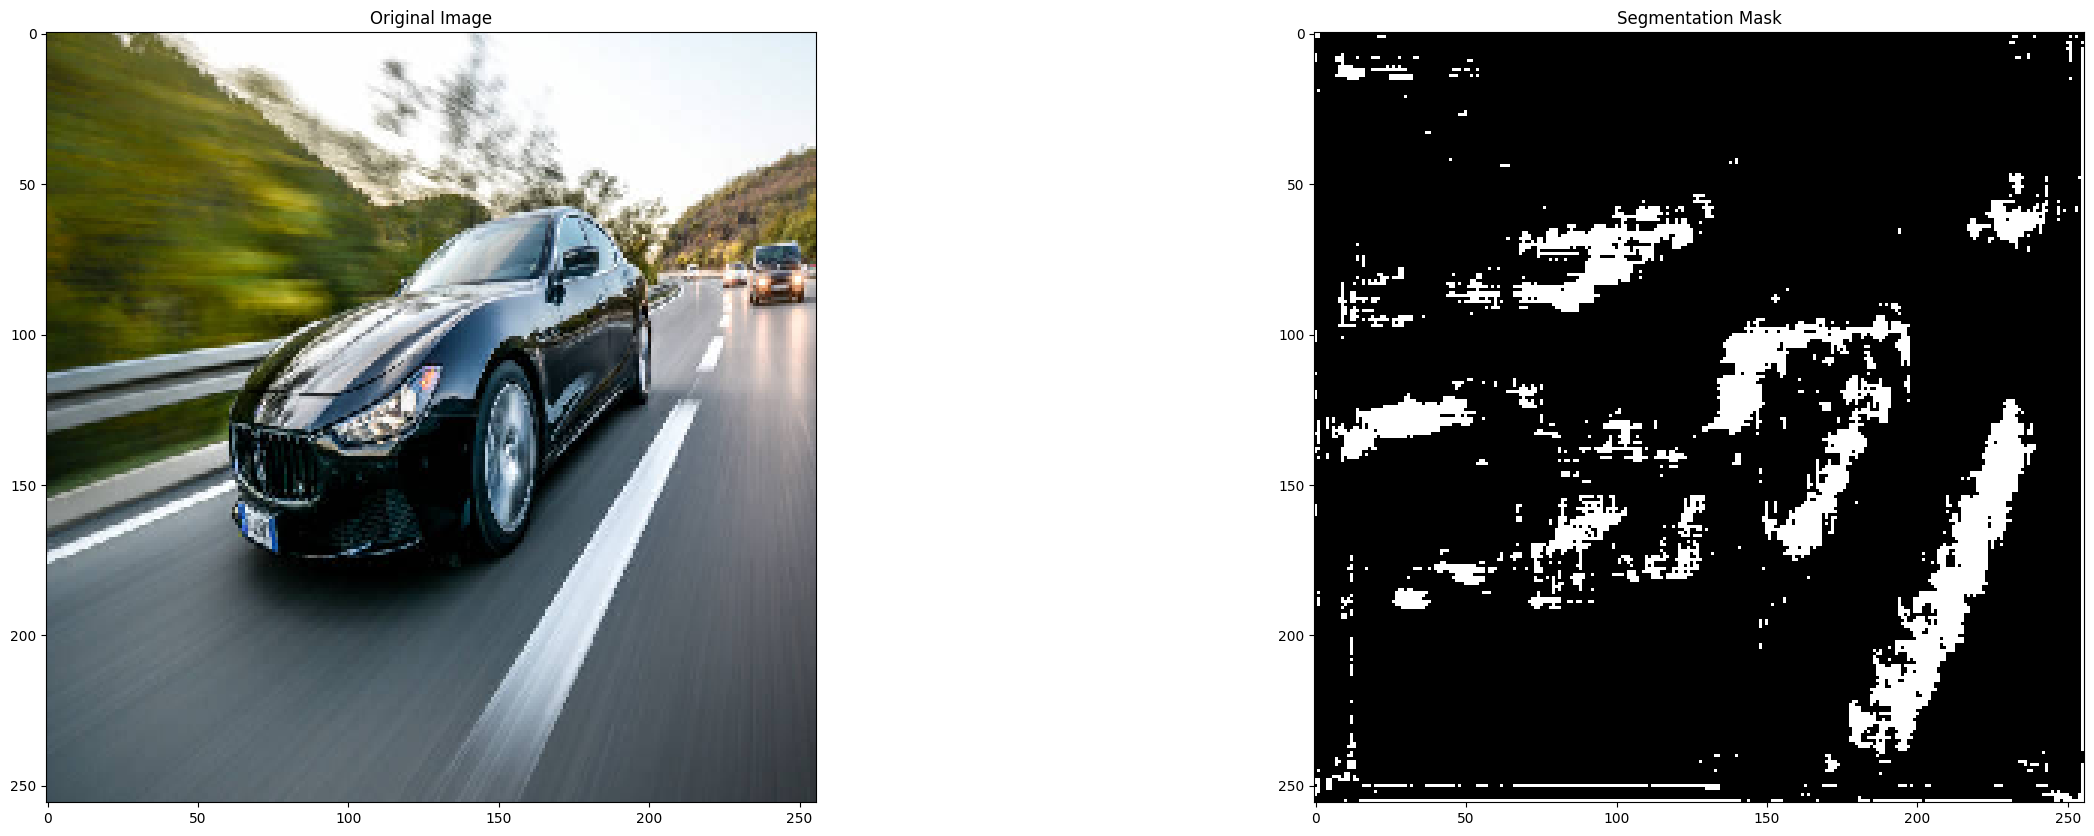

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the U-Net model
def create_unet_model(input_shape):
    inputs = tf.keras.layers.Input(input_shape)

    # Encoder
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    # Mid-level
    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    # Decoder
    conv4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    up1 = tf.keras.layers.UpSampling2D(size=(2, 2))(conv4)

    conv5 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(up1)
    conv5 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv5)
    up2 = tf.keras.layers.UpSampling2D(size=(2, 2))(conv5)

    conv6 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(up2)
    conv6 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv6)
    up3 = tf.keras.layers.UpSampling2D(size=(2, 2))(conv6)

    conv7 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(up3)
    conv7 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv7)

    outputs = tf.keras.layers.Conv2D(1, 1, activation='sigmoid')(conv7)  # 1 channel for binary segmentation

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    return model

# Load the image and pre-process it
image_path = "/content/maserati.jpg"
image = load_img(image_path, target_size=(256, 256))  # Adjust target_size as needed
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array = image_array / 255.0  # Normalize pixel values to [0, 1]

# Create and compile the U-Net model
input_shape = image_array.shape[1:]
model = create_unet_model(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Perform segmentation on the image
predicted_mask = model.predict(image_array)

# Threshold the predicted mask to get binary segmentation
threshold = 0.5
segmentation_mask = (predicted_mask > threshold).astype(np.uint8)

# Visualize the segmentation
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_array[0])
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(segmentation_mask[0, :, :, 0], cmap='gray')
plt.title("Segmentation Mask")
plt.show()
